<a href="https://colab.research.google.com/github/kkalla619/co2emissions/blob/main/Keerthana_Kalla_MATH_2315_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**:

A key contributor to climate change is the emissions of greenhouse gases, such as carbon dioxide (CO2). Using a data set from Our World in Data, we will use Python to analyze trends in CO2 emissions over the past 50 years. To investigate if any patterns or trends can be observed in the emission levels of the top 10 CO2 emitters over time, this analysis examines how their emissions have changed over time. This information will be important for policymakers, researchers, and concerned citizens as they work to develop strategies to mitigate the impact of greenhouse gases on the environment.

**data description:**
The data used in this lab is a dataset of greenhouse gas emissions from Our World in Data. It includes data on carbon dioxide (CO2) emissions from the top emitting countries from 1971 to 2020. The dataset is available in CSV format and can be downloaded from the following link: https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv 

## Imports

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

##### Solution

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [3]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

In [4]:
df = df.loc[df['country'].isin(non_countries)==False]
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [5]:
# This would also work too
# df = df.loc[df['country'].isin(non_countries) == False]


This code helps filter out any non-country entities from Dataframe(df). It is useful if the original dataset includes regions, groups, or other non-country entities that are not relevant for the analysis

the output is a new df which only contains observations for countires 

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

##### Solution

In [6]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

1) All the columns appear to have correct data 
2) Yes, some columns appear to have missing null values, especially with the ones that are below Int64Index: 39638



##### Solution

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

##### $\rightarrow$ What years are present in the data set?

##### Solution

In [8]:
years = df['year'].unique()
print(years)

[1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863
 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877
 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 1750 1751 1752 1753 1754 1755 1756 1757 1758 1759
 1760 1761 1762 1763 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773
 1774 

The purpose of this code is to extract data from the year column of df. 

the output of this code is a Numpy containing all the years in the year column of df.

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

In [9]:
# new data frame for the data from the year 2020 
df_2020 = df[df['year'] == 2020]

# group data by country and sum the 'co2' emissions for each country
total_co2_by_country = df_2020.groupby('country')['co2'].sum()

# sort countries in descending order
top_10_emitters = total_co2_by_country.sort_values(ascending=False).head(10)

print(top_10_emitters)


country
China            10956.213
United States     4715.691
India             2445.012
Russia            1624.221
Japan             1042.224
Iran               729.978
Saudi Arabia       661.193
Germany            639.381
Indonesia          609.786
South Korea        597.634
Name: co2, dtype: float64


The purpose of this code is that it creates new data 'df_2020' which contains all the data from the year 2020. It then groups the data in 'df_2020' by country and sums the CO2 emissions for each country and stores the result in.

the code then prints out the top 10 emitters and their total CO2 emissions in descending order 

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

Text(0, 0.5, 'Density')

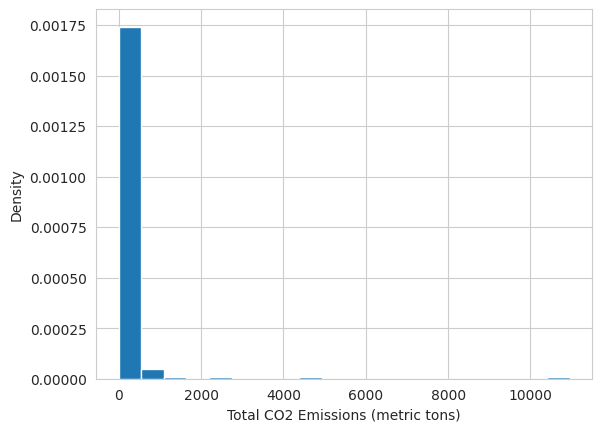

In [10]:
plt.hist(df_2020['co2'], density = True, bins = 20)

#Set the axis and title labels
plt.xlabel('Total CO2 Emissions (metric tons)')
plt.ylabel('Density')


The code creates a histogram of the total CO2 emissions for the year 2020.

the histogram is plotted with a density scale using 20 bins. The x-axis is labeled "Total CO2 emissions (metric tons)" and the y-axis is labeled "Density". 

the output is the histogram plot. 

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

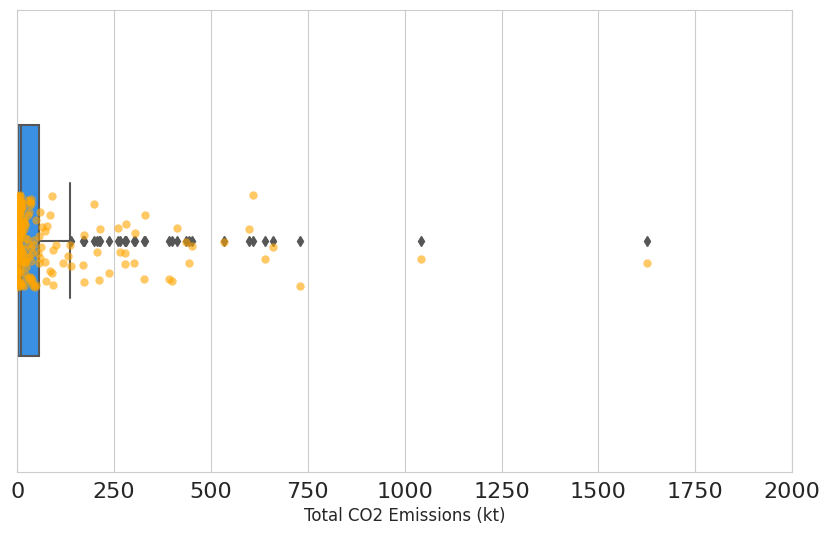

In [11]:
# Figure size 
plt.figure(figsize=(10,6))

# Use seaborn to make the boxplot
sns.boxplot(data=df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, showfliers = True)

# Add the stripplot on top
sns.stripplot(data=df[df['year'] == 2020], x='co2', color='orange', size = 6, alpha = 0.6)

# Set the title and axis labels
plt.xlabel('Total CO2 Emissions (kt)', fontsize=12)

plt.tick_params(labelsize = 16)
plt.xlim(0,2000)
plt.show()

The purpose of this code is to create a box plot and strip plot to visualize the distribution of total CO2 emissions in 2020. 

the output of the code is a plot that shows a box plot of the distribution of total CO2 emissions for each country in 2020, with a strip plot on top. Box plot shows the median, interquartiles range and range of distribution, while the strip plot shows individual data points. The plot also helps identify any outliers 

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

##### Solution

Yes, the CO2 emissions of the top 10 emitters in 2020 are outliers in the distribution as seen in the boxplot. They are represented as individuals points outside the whiskers of the box

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

In [12]:
df_2020 = df[df['year'] == 2020]

# Find the top 10 CO2 emitters in 2020 and save their country names as a list
top_10_emitters = df_2020.groupby('country')['co2'].sum().sort_values(ascending = False).head(10).index.tolist()

# Filter the data to only include rows for the top 10 CO2 emitters in 2020 
df_top_10_emitters = df[df['country'].isin(top_10_emitters)]

# Check if there are any missing (null) values in the 'co2' column of the top 10 emitter dataset
print(df_top_10_emitters['co2'].isnull().any())

True


This code selects data from the year 2020, finds the top 10 CO2 emitters, filters the data to only include the top 10 emitters, and checks for any missing values in the CO2 column of the filtered dataset.





##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

##### Solution

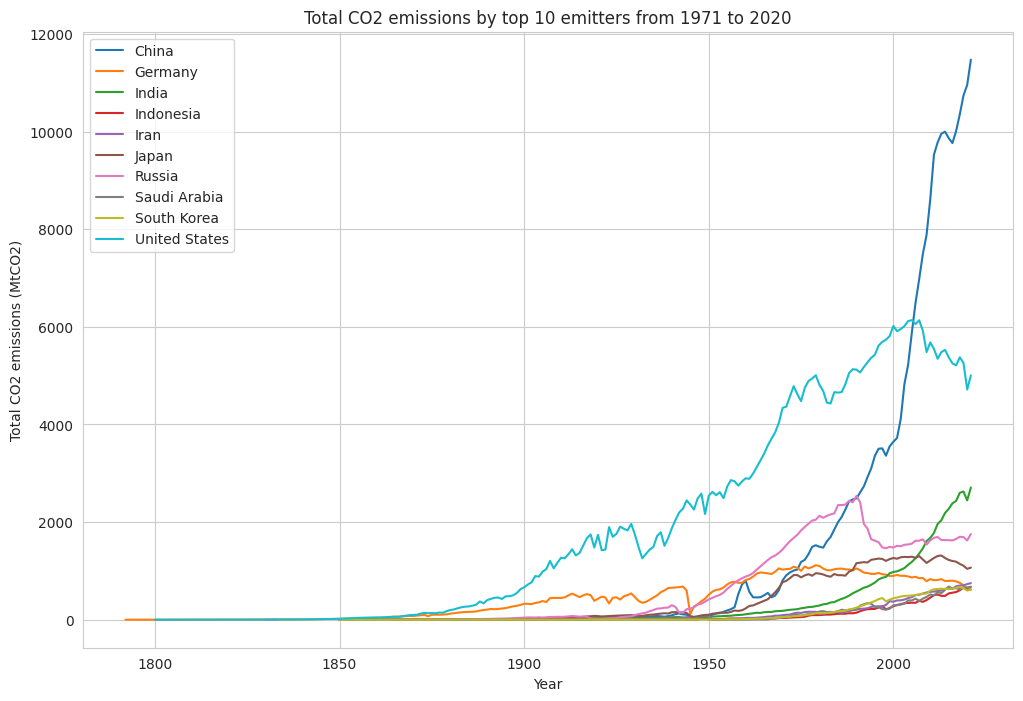

In [13]:
top_10_emitters = total_co2_by_country.sort_values(ascending=False).head(10).index.tolist()

# Filter the original dataframe to include only the top 10 emitters
df_top_10 = df[df['country'].isin(top_10_emitters)]

# Group the data by year and country, and sum the total CO2 emissions
co2_by_year_country = df_top_10.groupby(['year', 'country'])['co2'].sum().unstack()

# Create a time plot
plt.figure(figsize=(12, 8))
for country in co2_by_year_country.columns:
    plt.plot(co2_by_year_country.index, co2_by_year_country[country], label=country)
plt.title('Total CO2 emissions by top 10 emitters from 1971 to 2020')
plt.xlabel('Year')
plt.ylabel('Total CO2 emissions (MtCO2)')
plt.legend()
plt.show()

The code create a time plot of total 'co2' emissions by the top 10 emitters from 1971 to 2020.

The code first identifies the top 10 CO2 emitters in 2020 and filters the original dataframe to only include data for those countries. It then groups the data by year and country, and sums the total CO2 emissions.

 The output is a visualization that shows the trends of CO2 emissions over time for the top 10 emitters.


##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

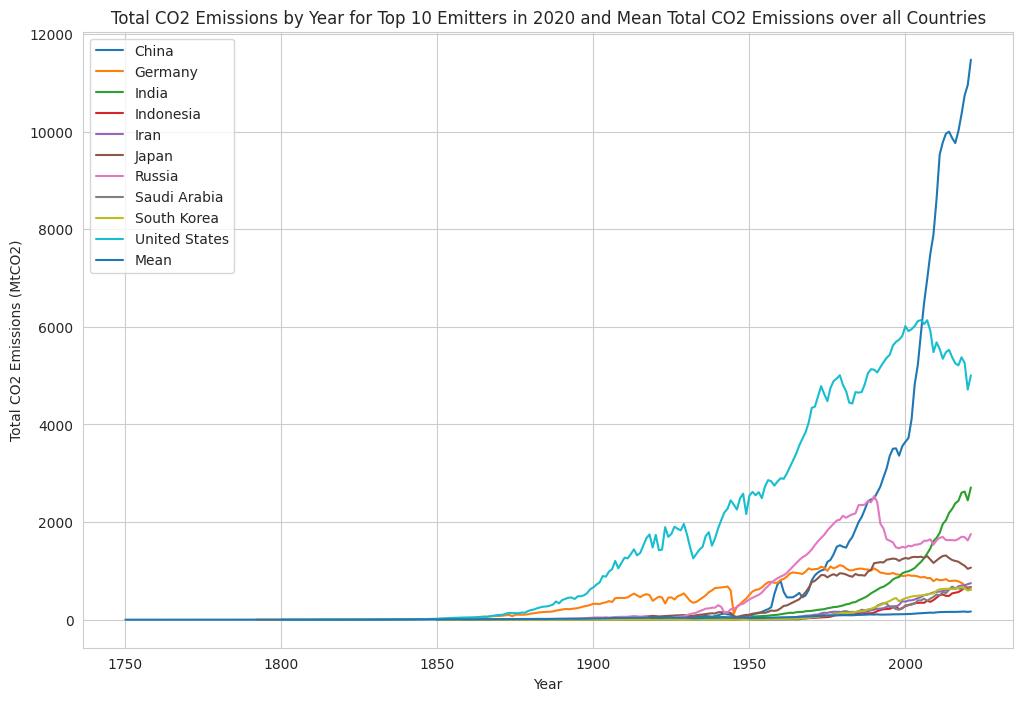

In [14]:
top_10_emitters = total_co2_by_country.sort_values(ascending=False).head(10).index.tolist()

df_top_10_emitters = df[df['country'].isin(top_10_emitters)]

co2_by_year_country = df_top_10_emitters.groupby(['year', 'country'])['co2'].sum().unstack()

# Compute the mean total CO2 emissions over all countries by year
co2_mean_by_year = df.groupby('year')['co2'].mean()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the total CO2 emissions for the top 10 emitters in 2020
for country in co2_by_year_country.columns:
    ax.plot(co2_by_year_country.index, co2_by_year_country[country], label=country)

# Plot the mean total CO2 emissions over all countries
ax.plot(co2_mean_by_year.index, co2_mean_by_year, label='Mean')

# Set the x-axis, y-axis labels, and title of the plot
ax.set_xlabel('Year')
ax.set_ylabel('Total CO2 Emissions (MtCO2)')

ax.set_title('Total CO2 Emissions by Year for Top 10 Emitters in 2020 and Mean Total CO2 Emissions over all Countries')

# Add a legend to the plot
ax.legend()






The purpose of this code is to plot the total CO2 emissions by year for the top 10 emitters in 2020 and the mean total CO2 emissions over all countries.

The output is a plot with two lines: one for each of the top 10 emitters in 2020 and another for the mean total CO2 emissions over all countries. The plot allows for easy comparison between the total CO2 emissions of the top 10 emitters and the mean total CO2 emissions over all countries over time.

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

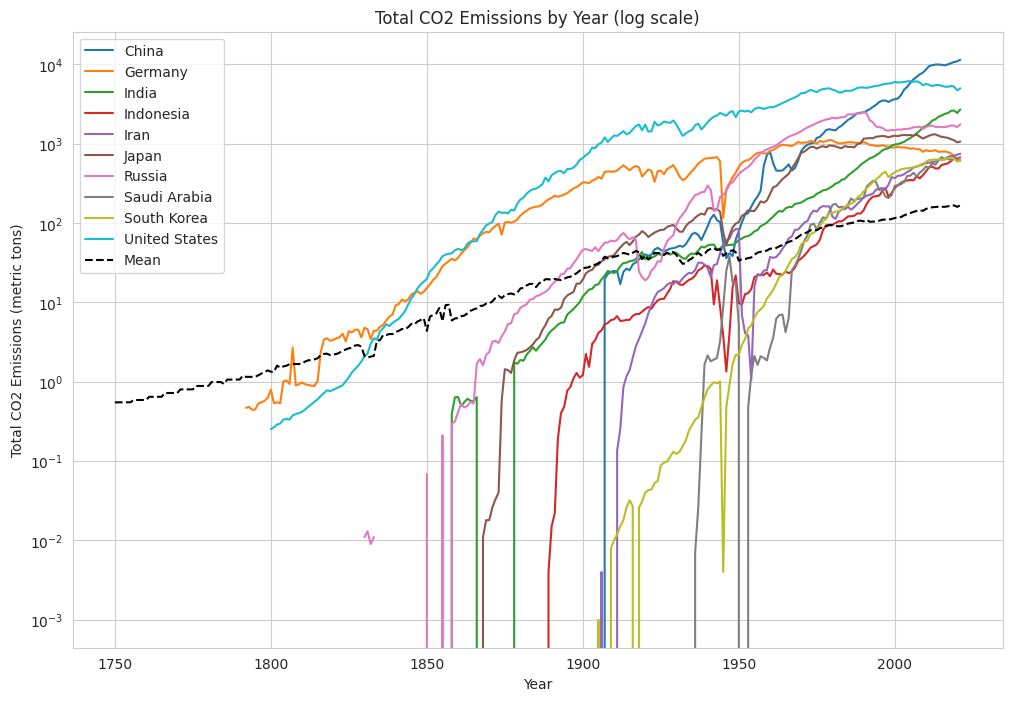

In [15]:
df_2020 = df[df['year'] == 2020]
total_co2_by_country = df_2020.groupby('country')['co2'].sum()
top_10_emitters = total_co2_by_country.sort_values(ascending=False).head(10).index.tolist()

# Compute the mean CO2 emissions over all countries
mean_co2_by_year = df.groupby('year')['co2'].mean()

# Compute the CO2 emissions for each of the top 10 emitters by year
co2_by_year_country = df[df['country'].isin(top_10_emitters)].groupby(['year', 'country'])['co2'].sum().unstack()

# Plot the data on a log scale
plt.figure(figsize=(12, 8))
for country in co2_by_year_country.columns:
    plt.plot(co2_by_year_country.index, co2_by_year_country[country], label=country)
plt.plot(mean_co2_by_year.index, mean_co2_by_year, label='Mean', linestyle='--', color='black')
plt.yscale('log')
plt.title('Total CO2 Emissions by Year (log scale)')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (metric tons)')
plt.legend()
plt.show()







This code selects all rows in the DataFrame where the 'year' column equals 2020, and then finds the top 10 CO2 emitters in 2020 based on the sum of their emissions. It then computes the mean CO2 emissions over all countries and the CO2 emissions for each of the top 10 emitters by year. 

Output produces plots on a log scale to show the trends in CO2 emissions over time for both the top 10 emitters and the mean value. The resulting plot shows the total CO2 emissions by year (on the y-axis) for each country in the top 10 list (as separate lines) and the mean CO2 emissions (dotted black line). 

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

Based on the plots produced earlier, we can see that all top 10 emitters had an increasing trend in CO2 emissions over the past 50 years with some countries having a rapid increase than others. This suggests the urgent need to take action to reduce global carbon emissions and mitigate the impact of climate change.